# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.100139e+01     7.040371e+00
 * time: 0.0030510425567626953
     1     2.841971e+01     4.833358e+00
 * time: 0.01368093490600586
     2     1.843385e+01     4.735845e+00
 * time: 0.02651214599609375
     3     1.253134e+01     2.419102e+00
 * time: 0.03934192657470703
     4     1.128283e+01     1.759094e+00
 * time: 0.04975295066833496
     5     1.042324e+01     1.426247e+00
 * time: 0.06019401550292969
     6     9.868055e+00     1.199860e+00
 * time: 0.07042312622070312
     7     9.438181e+00     1.081634e+00
 * time: 0.08076214790344238
     8     8.887727e+00     7.037049e-01
 * time: 0.09109807014465332
     9     8.573822e+00     5.357544e-01
 * time: 0.10205912590026855
    10     8.433718e+00     3.906598e-01
 * time: 0.11301493644714355
    11     8.359469e+00     4.128750e-01
 * time: 0.12429499626159668
    12     8.297790e+00     4.315721e-01
 * time: 0.13577699661254883
    13     8.241591e+00     4.086113e-01
 * tim

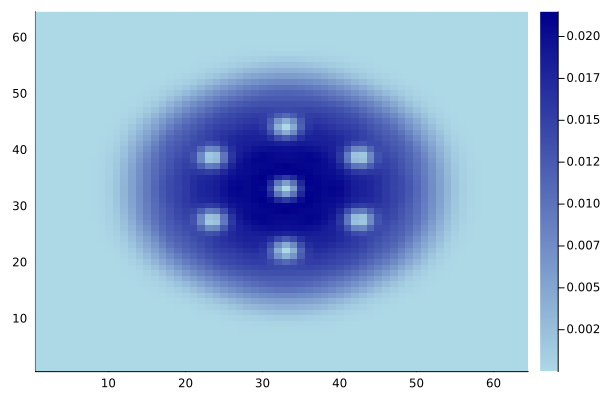

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)